### 基础操作

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
tf.__version__

'2.2.0'

In [3]:
x = [[1.]]
m = tf.matmul(x, x)
print(m)

tf.Tensor([[1.]], shape=(1, 1), dtype=float32)


In [4]:
x = tf.constant([[1,9],[3,6]])
x

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 9],
       [3, 6]], dtype=int32)>

In [5]:
x = tf.add(x, 1)
x

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 2, 10],
       [ 4,  7]], dtype=int32)>

### numpy转换

In [6]:
x.numpy()

array([[ 2, 10],
       [ 4,  7]], dtype=int32)

### 格式转换

In [7]:
x = tf.cast(x, tf.float32)
x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 2., 10.],
       [ 4.,  7.]], dtype=float32)>

In [8]:
x1 = np.ones([2,2])
x2 = tf.multiply(x1, 2)
x2

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[2., 2.],
       [2., 2.]])>

### 气温数据集演练

In [11]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [13]:
features = pd.read_csv('temps.csv')

#看看数据长什么样子
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


数据表中
* year,moth,day,week分别表示的具体的时间
* temp_2：前天的最高温度值
* temp_1：昨天的最高温度值
* average：在历史中，每年这一天的平均最高温度值
* actual：这就是我们的标签值了，当天的真实最高温度
* friend：这一列可能是凑热闹的，你的朋友猜测的可能值，咱们不管它就好了

In [14]:
print('数据维度:', features.shape)

数据维度: (348, 9)


In [15]:
# 处理时间数据
import datetime

# 分别得到年，月，日
years = features['year']
months = features['month']
days = features['day']

# datetime格式
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

In [16]:
dates[:5]

[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 2, 0, 0),
 datetime.datetime(2016, 1, 3, 0, 0),
 datetime.datetime(2016, 1, 4, 0, 0),
 datetime.datetime(2016, 1, 5, 0, 0)]

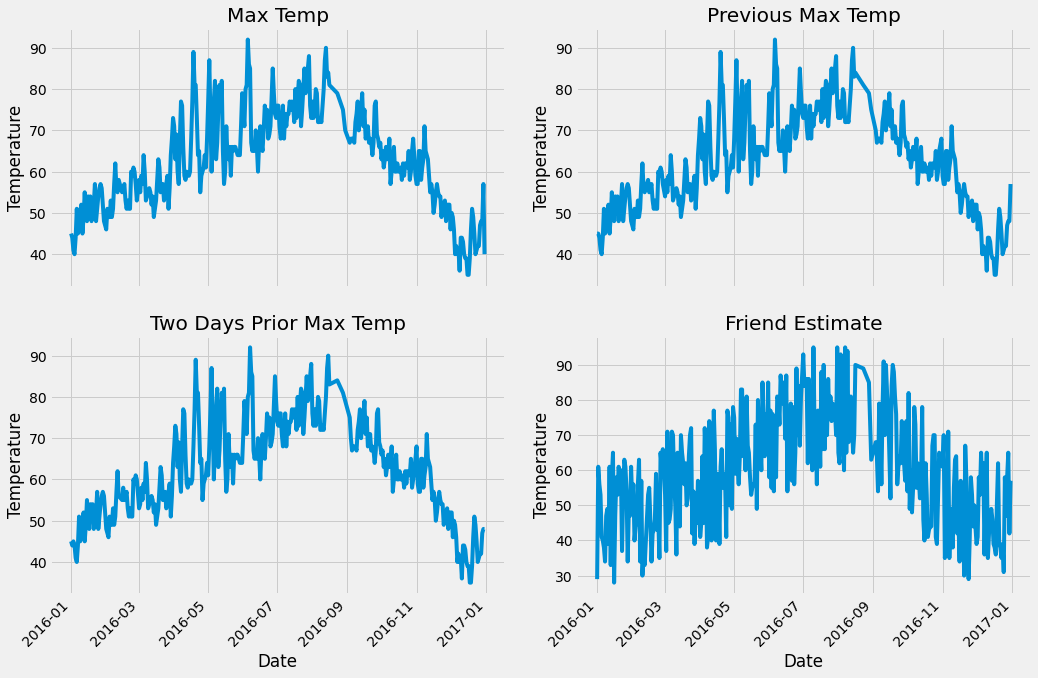

In [19]:
# 准备画图
# 指定默认风格
plt.style.use('fivethirtyeight')

# 设置布局
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (15,10))
fig.autofmt_xdate(rotation = 45)

# 标签值
ax1.plot(dates, features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature'); ax1.set_title('Max Temp')

# 昨天
ax2.plot(dates, features['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature'); ax2.set_title('Previous Max Temp')

# 前天
ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')

# 我的逗逼朋友
ax4.plot(dates, features['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature'); ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)

In [20]:
# 独热编码-星期
features = pd.get_dummies(features)
features.head(5)

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [21]:
# 标签
labels = np.array(features['actual'])

# 在特征中去掉标签
features= features.drop('actual', axis = 1)

# 名字单独保存一下，以备后患
feature_list = list(features.columns)

# 转换成合适的格式
features = np.array(features)

In [22]:
features.shape

(348, 14)

In [24]:
from sklearn import preprocessing
input_features = preprocessing.StandardScaler().fit_transform(features)

In [25]:
input_features[0]

array([ 0.        , -1.5678393 , -1.65682171, -1.48452388, -1.49443549,
       -1.3470703 , -1.98891668,  2.44131112, -0.40482045, -0.40961596,
       -0.40482045, -0.40482045, -0.41913682, -0.40482045])

In [26]:
model = tf.keras.Sequential()
model.add(layers.Dense(16))
model.add(layers.Dense(32))
model.add(layers.Dense(1))

compile相当于对网络进行配置，指定好优化器和损失函数等

In [27]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001),
             loss='mean_squared_error')

In [32]:
model.fit(input_features, labels, validation_split=0.25, epochs=100, batch_size=64)

Epoch 1/100
5/5 [==============================] - 0s 9ms/step - loss: 57.8379 - val_loss: 26.7633
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 26.1885 - val_loss: 19.7989
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 31.5171 - val_loss: 23.0292
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 29.4475 - val_loss: 23.4370
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 25.2228 - val_loss: 29.4650
Epoch 6/100
5/5 [==============================] - 0s 13ms/step - loss: 29.4784 - val_loss: 20.1529
Epoch 7/100
5/5 [==============================] - 0s 10ms/step - loss: 48.7709 - val_loss: 32.9640
Epoch 8/100
5/5 [==============================] - 0s 9ms/step - loss: 28.0443 - val_loss: 29.3023
Epoch 9/100
5/5 [==============================] - 0s 9ms/step - loss: 35.4501 - val_loss: 25.2688
Epoch 10/100
5/5 [==============================] - 0s 10ms/step - loss: 24.7102 - val_loss: 19.2906
Epoch 

Epoch 83/100
5/5 [==============================] - 0s 12ms/step - loss: 25.6790 - val_loss: 56.1997
Epoch 84/100
5/5 [==============================] - 0s 12ms/step - loss: 50.7292 - val_loss: 24.2612
Epoch 85/100
5/5 [==============================] - 0s 10ms/step - loss: 25.7805 - val_loss: 23.1399
Epoch 86/100
5/5 [==============================] - 0s 9ms/step - loss: 26.6063 - val_loss: 33.2447
Epoch 87/100
5/5 [==============================] - 0s 10ms/step - loss: 44.0817 - val_loss: 27.4841
Epoch 88/100
5/5 [==============================] - 0s 10ms/step - loss: 26.2794 - val_loss: 25.5219
Epoch 89/100
5/5 [==============================] - 0s 11ms/step - loss: 66.8004 - val_loss: 23.6418
Epoch 90/100
5/5 [==============================] - 0s 10ms/step - loss: 24.1576 - val_loss: 35.5403
Epoch 91/100
5/5 [==============================] - 0s 10ms/step - loss: 27.7678 - val_loss: 17.6816
Epoch 92/100
5/5 [==============================] - 0s 8ms/step - loss: 23.3883 - val_loss: 

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  240       
_________________________________________________________________
dense_1 (Dense)              multiple                  544       
_________________________________________________________________
dense_2 (Dense)              multiple                  33        
Total params: 817
Trainable params: 817
Non-trainable params: 0
_________________________________________________________________


### 调参

In [33]:
model = tf.keras.Sequential()
model.add(layers.Dense(16,kernel_initializer='random_normal'))
model.add(layers.Dense(32,kernel_initializer='random_normal'))
model.add(layers.Dense(1,kernel_initializer='random_normal'))

In [34]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001),
             loss='mean_squared_error')
model.fit(input_features, labels, validation_split=0.25, epochs=100, batch_size=64)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

5/5 [==============================] - 0s 18ms/step - loss: 4388.5396 - val_loss: 2868.4543
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 4285.7388 - val_loss: 2777.6221
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 4130.6445 - val_loss: 2640.0928
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 3674.0430 - val_loss: 2514.6028
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 992.7341 - val_loss: 241

Epoch 75/100
5/5 [==============================] - 0s 15ms/step - loss: 32.3277 - val_loss: 30.7795
Epoch 76/100
5/5 [==============================] - 0s 15ms/step - loss: 34.1124 - val_loss: 19.0548
Epoch 77/100
5/5 [==============================] - 0s 15ms/step - loss: 25.2179 - val_loss: 29.6618
Epoch 78/100
5/5 [==============================] - 0s 8ms/step - loss: 42.8004 - val_loss: 20.6805
Epoch 79/100
5/5 [==============================] - 0s 10ms/step - loss: 47.8072 - val_loss: 26.2329
Epoch 80/100
5/5 [==============================] - 0s 9ms/step - loss: 38.0986 - val_loss: 37.0214
Epoch 81/100
5/5 [==============================] - 0s 9ms/step - loss: 35.2926 - val_loss: 36.9249
Epoch 82/100
5/5 [==============================] - 0s 9ms/step - loss: 29.7820 - val_loss: 19.0604
Epoch 83/100
5/5 [==============================] - 0s 7ms/step - loss: 29.4868 - val_loss: 27.9308
Epoch 84/100
5/5 [==============================] - 0s 11ms/step - loss: 46.2312 - val_loss: 17.

### 加入正则化惩罚项

In [35]:
model = tf.keras.Sequential()
model.add(layers.Dense(16,kernel_initializer='random_normal',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model.add(layers.Dense(32,kernel_initializer='random_normal',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model.add(layers.Dense(1,kernel_initializer='random_normal',kernel_regularizer=tf.keras.regularizers.l2(0.03)))

model.compile(optimizer=tf.keras.optimizers.SGD(0.001),
             loss='mean_squared_error')
model.fit(input_features, labels, validation_split=0.25, epochs=100, batch_size=64)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

5/5 [==============================] - 0s 23ms/step - loss: 4390.2373 - val_loss: 2868.4998
Epoch 2/100
5/5 [==============================] - 0s 12ms/step - loss: 4292.4653 - val_loss: 2784.7522
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 4172.7266 - val_loss: 2664.2441
Epoch 4/100
5/5 [==============================] - 0s 12ms/step - loss: 3943.6467 - val_loss: 2438.7766
Epoch 5/100
5/5 [==============================] - 0s 14ms/step - loss: 2835.4915 - val_loss:

Epoch 75/100
5/5 [==============================] - 0s 15ms/step - loss: 37.5443 - val_loss: 24.9608
Epoch 76/100
5/5 [==============================] - 0s 14ms/step - loss: 33.2303 - val_loss: 30.0481
Epoch 77/100
5/5 [==============================] - 0s 14ms/step - loss: 41.5605 - val_loss: 31.7606
Epoch 78/100
5/5 [==============================] - 0s 13ms/step - loss: 34.9613 - val_loss: 23.3976
Epoch 79/100
5/5 [==============================] - 0s 12ms/step - loss: 27.6859 - val_loss: 25.4198
Epoch 80/100
5/5 [==============================] - 0s 10ms/step - loss: 26.9675 - val_loss: 33.9418
Epoch 81/100
5/5 [==============================] - 0s 12ms/step - loss: 48.8429 - val_loss: 22.1301
Epoch 82/100
5/5 [==============================] - 0s 15ms/step - loss: 28.5679 - val_loss: 19.4347
Epoch 83/100
5/5 [==============================] - 0s 11ms/step - loss: 27.7265 - val_loss: 24.5590
Epoch 84/100
5/5 [==============================] - 0s 10ms/step - loss: 29.1328 - val_loss

### 预测模型结果

In [36]:
predict = model.predict(input_features)
predict.shape

(348, 1)

In [37]:
# 创建一个表格来存日期和其对应的标签数值
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

In [38]:
true_data

,date,actual
0,2016-01-01,45
1,2016-01-02,44
2,2016-01-03,41
3,2016-01-04,40
4,2016-01-05,44
...,...,...
343,2016-12-27,47
344,2016-12-28,48
345,2016-12-29,48
346,2016-12-30,57


In [39]:
# 同理，再创建一个来存日期和其对应的模型预测值
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]

test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predict.reshape(-1)}) 

In [40]:
predictions_data

,date,prediction
0,2016-01-01,51.413925
1,2016-01-02,54.801258
2,2016-01-03,49.668713
3,2016-01-04,46.830349
4,2016-01-05,46.972004
...,...,...
343,2016-12-27,41.441853
344,2016-12-28,45.440357
345,2016-12-29,47.945438
346,2016-12-30,46.212223


Text(0.5, 1.0, 'Actual and Predicted Values')

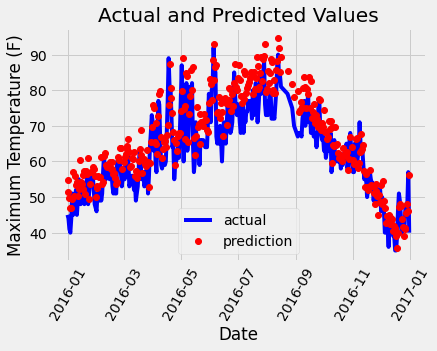

In [41]:
# 真实值
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

# 预测值
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# 图名
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values')